<a href='https://github.com/SeWonKwon' ><div> <img src ='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/6556674324ed41a289a354258718280d/964e5a8b-75ad-41fc-ae75-0ca66d06fbc7.png' align='left' /> </div></a>


자료 출처 : https://www.kaggle.com/c/house-prices-advanced-regression-techniques

# Data_Load

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SeWonKwon/ML_training/main/Kaggle/House%20Prices/Data/train.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [22]:
def get_df_info(df, short=False):
    print('데이터 세트의 Shape:', df.shape)
    print('\n전체 피처의 dtype\n', df.dtypes.value_counts())
    isnull_series = df.isnull().sum()
    null_column_count = df.isnull().sum()[df.isnull().sum()>0]
    df_null = pd.DataFrame({'dtype':df.dtypes[null_column_count.index], 'count':df.isnull().sum()[df.isnull().sum()>0]})
    
    if short:
        print('\n### Null info short ###')
        display(df_null.sort_values('count',ascending=False).head())
        print('### DF description short ###')
        display(df.describe().T.head())
    else:
        print('\n### Null info ###')
        display(df_null.sort_values('count',ascending=False))
        print('### DF description ###')
        display(df.describe().T)

In [23]:
get_df_info(df, short=True)

데이터 세트의 Shape: (1460, 75)

전체 피처의 dtype
 object     38
int64      33
float64     4
dtype: int64

### Null info short ###


,dtype,count
GarageType,object,81
GarageFinish,object,81
GarageQual,object,81
GarageCond,object,81
BsmtExposure,object,38


### DF description short ###


,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.0,50.000000,70.0,190.0
LotFrontage,1460.0,70.049958,22.024023,21.0,60.0,70.049958,79.0,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.5,9478.500000,11601.5,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.0,6.000000,7.0,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.0,5.000000,6.0,9.0


# Target Analysis 

In [6]:
df.SalePrice.std()

79442.50288288663

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

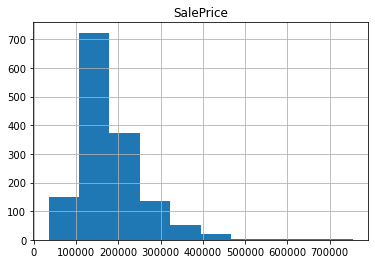

In [7]:
df.hist('SalePrice')

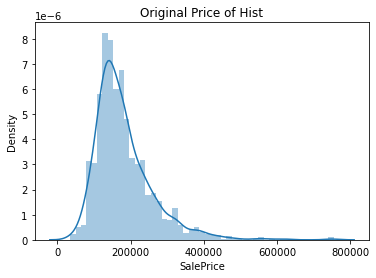

In [8]:
plt.title('Original Price of Hist')
sns.distplot(df.SalePrice);

왼쪽으로 치우쳐져 있으므로, 정규 분포형을 위해서 log1p변환을 해보자~

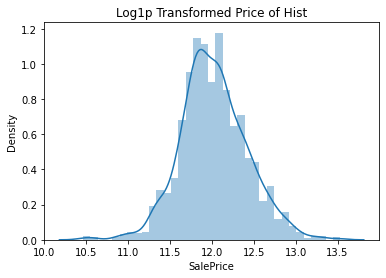

In [9]:
log_saleprice = np.log1p(df.SalePrice)
plt.title('Log1p Transformed Price of Hist')
sns.distplot(log_saleprice);

정규 분포 형태로 결괏값이 분포함을 확인 할수 있다. 

In [10]:
null_columns = df.isnull().sum().sort_values(ascending=False)[:5].index.tolist()
null_columns

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

In [11]:
# SalePrice 로그 변환
original_SalePrice = df['SalePrice'] # 이전 값 저장
df['SalePrice'] = np.log1p(df.SalePrice)

# Null 이 너무 많은 컬럼들과 불필요한 컬럼 삭제
df.drop(['Id']+null_columns, axis=1, inplace=True)

# 드롭하지 않은 숫자형 Null 칼럼은 평균값으로 대체
df.fillna(df.mean(), inplace=True)

In [21]:
get_df_info(df, short=True)

데이터 세트의 Shape: (1460, 75)

전체 피처의 dtype
 object     38
int64      33
float64     4
dtype: int64

Null info short


,dtype,count
GarageType,object,81
GarageFinish,object,81
GarageQual,object,81
GarageCond,object,81
BsmtExposure,object,38


DF description short


,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.0,50.000000,70.0,190.0
LotFrontage,1460.0,70.049958,22.024023,21.0,60.0,70.049958,79.0,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.5,9478.500000,11601.5,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.0,6.000000,7.0,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.0,5.000000,6.0,9.0


문자형을 제외하고는 Null 값이 없기 때문에 원한 인코딩으로 변환 하겠습니다. 

In [14]:
df_ohe = pd.get_dummies(df)
get_df_info(df_ohe)

데이터 세트의 Shape: (1460, 271)

전체 피처의 dtype
 uint8      234
int64       33
float64      4
dtype: int64


,dtype,count


,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.0,50.000000,70.0,190.0
LotFrontage,1460.0,70.049958,22.024023,21.0,60.0,70.049958,79.0,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.5,9478.500000,11601.5,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.0,6.000000,7.0,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.0,5.000000,6.0,9.0
...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,1460.0,0.002740,0.052289,0.0,0.0,0.000000,0.0,1.0
SaleCondition_Alloca,1460.0,0.008219,0.090317,0.0,0.0,0.000000,0.0,1.0
SaleCondition_Family,1460.0,0.013699,0.116277,0.0,0.0,0.000000,0.0,1.0
SaleCondition_Normal,1460.0,0.820548,0.383862,0.0,1.0,1.000000,1.0,1.0


**Reference**

* <a href='https://github.com/SeWonKwon' ><div> <img src ='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/6556674324ed41a289a354258718280d/964e5a8b-75ad-41fc-ae75-0ca66d06fbc7.png' align='left' /> </div></a>

<br>

* 파이썬 머신러닝 완벽 가이드, 권철민